In [6]:
!pip install imageio

    100% |████████████████████████████████| 3.3MB 8.1MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio


In [4]:
!pip install torch

    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5a1fc000 @  0x7f3c1bc971c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


In [56]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [1]:
!pip install ipywidgets

    100% |████████████████████████████████| 112kB 4.5MB/s 
    100% |████████████████████████████████| 2.2MB 7.7MB/s 


In [16]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 3.9MB/s 
    100% |████████████████████████████████| 235kB 7.6MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt
import torch
import pandas as pd
from torch.utils import data
%matplotlib inline

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajdeep04","key":"0734dd7d4482886fbd455d6ef4c20278"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading the dataset from kaggle [here](https://https://www.kaggle.com/c/tgs-salt-identification-challenge/data)

In [19]:
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 64.8MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 77.1MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 121MB/s]
 94% 153M/163M [00:00<00:00, 140MB/s]
100% 163M/163M [00:00<00:00, 203MB/s]
 58% 22.0M/37.9M [00:00<00:00, 93.5MB/s]
100% 37.9M/37.9M [00:00<00:00, 141MB/s] 


In [20]:
!ls
!unzip train.zip

depths.csv   sample_data	    test.zip   train.zip
kaggle.json  sample_submission.csv  train.csv
Archive:  train.zip
   creating: images/
   creating: masks/
  inflating: images/8d08955cdf.png   
  inflating: images/e045664b46.png   
  inflating: images/4989c6509e.png   
  inflating: images/fff4eb4941.png   
  inflating: images/3a310860a3.png   
  inflating: images/7a696bb878.png   
  inflating: images/8d3ee9356b.png   
  inflating: images/213e0a9f7b.png   
  inflating: images/78f17697f2.png   
  inflating: images/bd20d18369.png   
  inflating: images/de08c5a3b7.png   
  inflating: images/f06ef6c8b7.png   
  inflating: images/b2d02516e1.png   
  inflating: images/5edb37f5a8.png   
  inflating: images/b1f0e104f5.png   
  inflating: images/40e8e14e60.png   
  inflating: images/6e1444d88d.png   
  inflating: images/f342603c76.png   
  inflating: images/7ba58ee1be.png   
  inflating: images/14a89a1840.png   
  inflating: images/4319885cf1.png   
  inflating: images/bb697642ae.png   
  infla

Here we define a class for the dataset and we will have methods of getting the dataset

In [0]:
class TGS(data.Dataset):
  def __init__(self,root_path,file_list):
    self.root_path=root_path
    self.file_list=file_list
  def __len__(self):
      return len(self.file_list)
  def __getitem__(self,index):
    if index not in range(0,len(self.file_list)):
      return self.__getitem__(np.random.randint(0,self.__len__())) #if the index is out of range, retirn a rand image.
    file_id = self.file_list[index]
    image_folder=os.path.join(self.root_path,"images")
    image_path = os.path.join(image_folder, file_id + ".png")
    mask_folder=os.path.join(self.root_path,"masks")
    mask_path=os.path.join(mask_folder,file_id+".png")
    image=np.array(imageio.imread(image_path),dtype=np.uint8)#store the images in an array
    mask=np.array(imageio.imread(mask_path),dtype=np.uint8)
    return image,mask

Training image and mask data read

In [0]:
train_mask=pd.read_csv('train.csv')
depth=pd.read_csv('depths.csv')
train_path="./"
file_list=list(train_mask['id'].values)
dataset=TGS(train_path,file_list)

Visualization of images

In [0]:
def vizarr(image, mask):
    x, arr = plt.subplots(1,2)
    arr[0].imshow(image)
    arr[1].imshow(mask)
    arr[0].grid()
    arr[1].grid()
    arr[0].set_title('Image')
    arr[1].set_title('Mask')

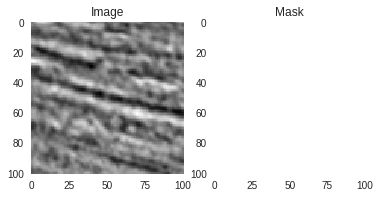

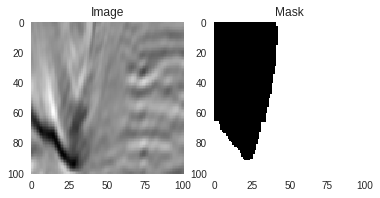

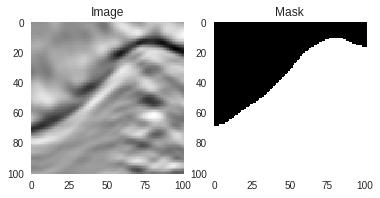

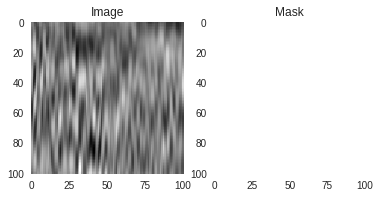

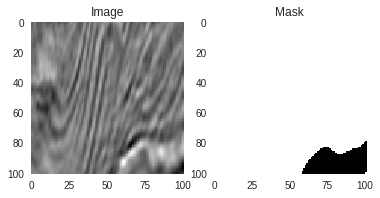

In [64]:
for i in range(0,5):
    image, mask = dataset[np.random.randint(0, len(dataset))]
    vizarr(image, mask)

Text(0.5,1,'Distribution of depths')

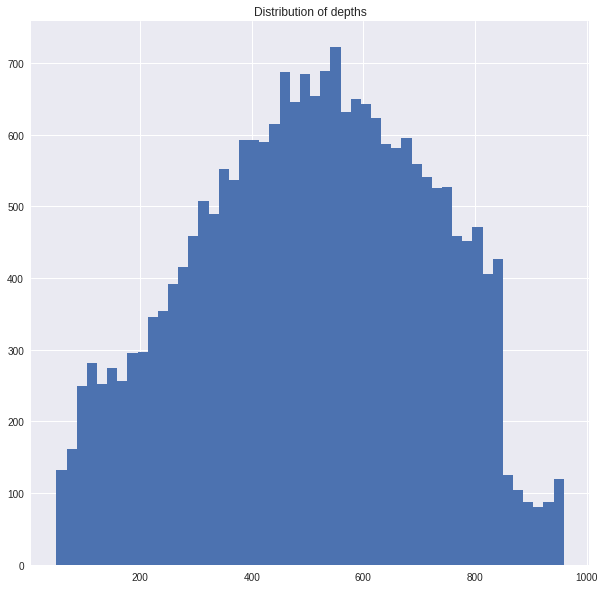

In [52]:
plt.figure(figsize = (10, 10))
plt.hist(depth['z'], bins = 50)
plt.title('Distribution of depths')

Now for data compression- Run length encoding is used.
This function will convert to image

In [0]:
def rletomask(rlestring,height,width):
  rows,cols=height,width
  try:
    rleNumbers=[int(numstring) for numstring in rlestring.split(' ')]
    rlePairs=np.array(rle.Numbers).reshape(1,-2)
    img=np.zeros(rows*cols,dtype=unit8)
    for index,length in rlePairs:#get pixel value for each rlepairs
      index-=-1
      img[index:index+length]=255
    img=img.reshape(cols,rows)
    img=img.T
  #exception, returns an empty image
  except:
    img=np.zeros((cols,rows))
  return img

Measuring salt quantity in the image

In [0]:
def salt_proportion(imgArray):
    try: 
        unique, counts = np.unique(imgArray, return_counts=True)
        return counts[1]/10201.
    
    except: 
        return 0.0

Merging the depths with other data frame objects

In [0]:
train_mask['mask'] = train_mask['rle_mask'].apply(lambda x: rletomask(x, 101,101))
train_mask['salt_proportion'] = train_mask['mask'].apply(lambda x: salt_proportion(x))

In [91]:
merged = train_mask.merge(depth, how = 'left')
merged.head()

,id,rle_mask,mask,salt_proportion,z
0,575d24d81d,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,843
1,a266a2a9df,5051 5151,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,794
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,468
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,727
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,797


Text(0.5,1,'Proportion of salt vs. depth')

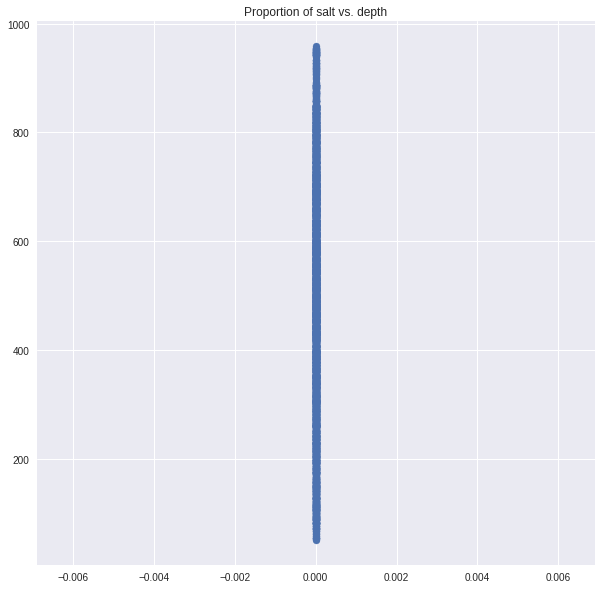

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(merged['salt_proportion'], merged['z'])
plt.title('Proportion of salt vs. depth')

In [0]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
import sys
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize


In [0]:
im_width = 128
im_height = 128
border = 5
im_chan = 2
n_features = 1 

U-net model

In [95]:
input_img = Input((im_height, im_width, im_chan), name='img')
input_features = Input((n_features, ), name='feat')
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (input_img)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
f_repeat = RepeatVector(8*8)(input_features)
f_conv = Reshape((8, 8, n_features))(f_repeat)
p4_feat = concatenate([p4, f_conv], -1)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4_feat)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)
u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)
u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)
u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)
u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)
outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
model = Model(inputs=[input_img, input_features], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy') #, metrics=[mean_iou]) # The mean_iou metrics seens to leak train and test values...
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  152         img[0][0]                        
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 8)    0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [97]:
train_ids = next(os.walk(train_path+"images"))[2]
X = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.float32)
y = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)
X_feat = np.zeros((len(train_ids), n_features), dtype=np.float32)
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = train_path
    img = load_img(path + '/images/' + id_, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
    x_center_mean = x_img[border:-border, border:-border].mean()
    x_csum = (np.float32(x_img)-x_center_mean).cumsum(axis=0)
    x_csum -= x_csum[border:-border, border:-border].mean()
    x_csum /= max(1e-3, x_csum[border:-border, border:-border].std())
    mask = img_to_array(load_img(path + '/masks/' + id_, grayscale=True))
    mask = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)
    X[n, ..., 0] = x_img.squeeze() / 255
    X[n, ..., 1] = x_csum.squeeze()
    y[n] = mask / 255
print('Completed')

100%|██████████| 4000/4000 [00:18<00:00, 214.44it/s]

Completed


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, X_feat_train, X_feat_valid, y_train, y_valid = train_test_split(X, X_feat, y, test_size=0.15, random_state=42)

In [100]:
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

results = model.fit({'img': X_train, 'feat': X_feat_train}, y_train, batch_size=16, epochs=50, callbacks=callbacks,
                    validation_data=({'img': X_valid, 'feat': X_feat_valid}, y_valid))

Train on 3400 samples, validate on 600 samples
Epoch 1/50
3400/3400 [==============================] - 269s 79ms/step - loss: 0.5328 - val_loss: 0.4146

Epoch 00001: val_loss improved from inf to 0.41463, saving model to model-tgs-salt-1.h5
Epoch 2/50
3400/3400 [==============================] - 267s 79ms/step - loss: 0.3980 - val_loss: 0.3578

Epoch 00002: val_loss improved from 0.41463 to 0.35781, saving model to model-tgs-salt-1.h5
Epoch 3/50
3400/3400 [==============================] - 268s 79ms/step - loss: 0.3184 - val_loss: 0.3829

Epoch 00003: val_loss did not improve from 0.35781
Epoch 4/50
3400/3400 [==============================] - 269s 79ms/step - loss: 0.2999 - val_loss: 0.2458

Epoch 00004: val_loss improved from 0.35781 to 0.24575, saving model to model-tgs-salt-1.h5
Epoch 5/50
3400/3400 [==============================] - 269s 79ms/step - loss: 0.2676 - val_loss: 0.2264

Epoch 00005: val_loss improved from 0.24575 to 0.22644, saving model to model-tgs-salt-1.h5
Epoch 6/